In [122]:
import numpy as np
import pandas_datareader as pdr

In [123]:
import yfinance as yf

df = yf.download("TSLA", start="2015-01-01", end="2024-12-31")
df.head()


C:\Users\Divyansh\AppData\Local\Temp\ipykernel_19776\2499730030.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("TSLA", start="2015-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2015-01-02,14.620667,14.883333,14.217333,14.858000,71466000
2015-01-05,14.006000,14.433333,13.810667,14.303333,80527500
2015-01-06,14.085333,14.280000,13.614000,14.004000,93928500
2015-01-07,14.063333,14.318667,13.985333,14.223333,44526000
2015-01-08,14.041333,14.253333,14.000667,14.187333,51637500


In [124]:
import pandas as pd
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2515 entries, 2015-01-02 to 2024-12-30
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, TSLA)   2515 non-null   float64
 1   (High, TSLA)    2515 non-null   float64
 2   (Low, TSLA)     2515 non-null   float64
 3   (Open, TSLA)    2515 non-null   float64
 4   (Volume, TSLA)  2515 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 117.9 KB


In [125]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
count,2515.000000,2515.000000,2515.000000,2515.000000,2.515000e+03
mean,115.564847,118.127021,112.871415,115.578935,1.123272e+08
std,114.104456,116.747743,111.357651,114.169550,7.408223e+07
min,9.578000,10.331333,9.403333,9.488000,1.062000e+07
25%,17.185000,17.480000,16.888333,17.174334,6.681690e+07
50%,28.502001,28.713333,27.333332,28.299999,9.286200e+07
75%,220.178337,225.253334,215.294998,220.825005,1.298032e+08
max,479.859985,488.540009,457.510010,475.899994,9.140820e+08


In [126]:
df.columns

MultiIndex([( 'Close', 'TSLA'),
            (  'High', 'TSLA'),
            (   'Low', 'TSLA'),
            (  'Open', 'TSLA'),
            ('Volume', 'TSLA')],
           names=['Price', 'Ticker'])

In [127]:
# df has MultiIndex columns like ('Close', 'TSLA')
df.columns = df.columns.droplevel(1)  # Remove ticker name like 'TSLA'
df.to_csv('TSLA_clean.csv')          


In [128]:
df = pd.read_csv('TSLA_clean.csv', index_col='Date', parse_dates=True)


In [129]:
df.head()

,Close,High,Low,Open,Volume
Date,,,,,
2015-01-02,14.620667,14.883333,14.217333,14.858000,71466000
2015-01-05,14.006000,14.433333,13.810667,14.303333,80527500
2015-01-06,14.085333,14.280000,13.614000,14.004000,93928500
2015-01-07,14.063333,14.318667,13.985333,14.223333,44526000
2015-01-08,14.041333,14.253333,14.000667,14.187333,51637500


In [130]:
df.tail()

,Close,High,Low,Open,Volume
Date,,,,,
2024-12-23,430.600006,434.510010,415.410004,431.000000,72698100
2024-12-24,462.279999,462.779999,435.140015,435.899994,59551800
2024-12-26,454.130005,465.329987,451.019989,465.160004,76366400
2024-12-27,431.660004,450.000000,426.500000,449.519989,82666800
2024-12-30,417.410004,427.000000,415.750000,419.399994,64941000


In [131]:
df1 = df.reset_index()['Close']
df1

0        14.620667
1        14.006000
2        14.085333
3        14.063333
4        14.041333
           ...    
2510    430.600006
2511    462.279999
2512    454.130005
2513    431.660004
2514    417.410004
Name: Close, Length: 2515, dtype: float64

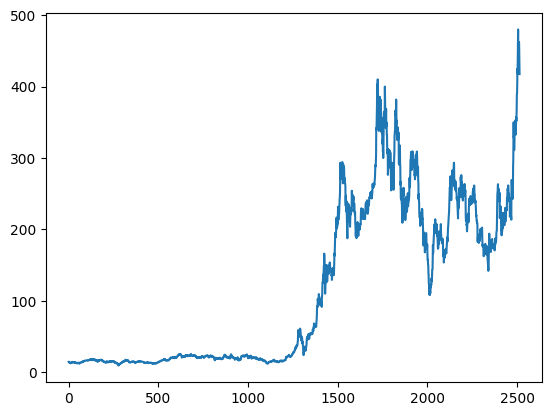

In [132]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [133]:
training_size = int(len(df1) * 0.70)
train_data = df1[0:training_size]
test_data = df1[training_size:]
print(train_data.shape)
print(test_data.shape)


(1760,)
(755,)


In [134]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
train_data = scaler.fit_transform(np.array(train_data).reshape(-1,1))
test_data = scaler.transform(np.array(test_data).reshape(-1,1))


In [135]:
print(train_data)

[[0.01259433]
 [0.01105916]
 [0.0112573 ]
 ...
 [0.86437455]
 [0.8868026 ]
 [0.88224873]]


In [136]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [],[]
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])

    return np.array(dataX),np.array(dataY)

In [137]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data,time_step)

In [138]:
print(X_train.shape),print(y_train.shape)

(1659, 100)
(1659,)


(None, None)

In [139]:
print(X_test.shape),print(y_test.shape)

(654, 100)
(654,)


(None, None)

In [140]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [141]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [142]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

c:\college\PRACTICE AND PROJECTS\ML\Stock Trend Prediction using LSTM\Stock-Trend-Prediction\venv1\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [143]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_9 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [144]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 106ms/step - loss: 0.0229 - val_loss: 0.0054
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - loss: 0.0014 - val_loss: 0.0059
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - loss: 8.3279e-04 - val_loss: 0.0058
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - loss: 7.7916e-04 - val_loss: 0.0044
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - loss: 0.0010 - val_loss: 0.0040
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - loss: 5.8513e-04 - val_loss: 0.0038
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - loss: 6.9330e-04 - val_loss: 0.0036
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - loss: 6.7045e-04 - val_loss: 0.0039
Epoch 9/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - loss: 8.5956e-04 - val_loss: 0.0032
Epoch 10/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - loss: 7.7757e-04 - val_loss: 0.0030
Epoch 11/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - loss: 7.4791e-04 - val_loss: 0.0030
Epoch 12/100
26/26 

In [145]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
# Inverse y_train/y_test for RMSE
y_train_inv = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_inv  = scaler.inverse_transform(y_test.reshape(-1, 1))

In [150]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error


In [151]:
# RMSE
print("Train RMSE:", math.sqrt(mean_squared_error(y_train_inv, train_predict)))
print("Test RMSE :", math.sqrt(mean_squared_error(y_test_inv, test_predict)))

Train RMSE: 4.372483592654929
Test RMSE : 9.100986648209803


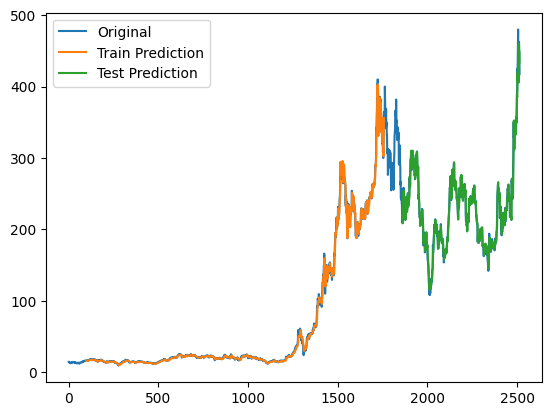

In [158]:
### Plotting 
# shift train predictions for plotting
look_back=100
df1 = np.array(df1).reshape(-1,1)
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(df1, label="Original")
plt.plot(trainPredictPlot, label="Train Prediction")
plt.plot(testPredictPlot, label="Test Prediction")
plt.legend()
plt.show()

In [160]:
x_input=test_data[-time_step:].reshape(1,-1)


In [161]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [162]:
temp_input

[0.47269175139530006,
 0.4755889213157073,
 0.4693200785325998,
 0.495144761114019,
 0.4790355558110065,
 0.5109043106066117,
 0.5158494536710136,
 0.5323333146985206,
 0.5282872920194303,
 0.5337069761357504,
 0.5022128389550148,
 0.5263392042028591,
 0.5085816051751709,
 0.49859139560931814,
 0.4899498475666206,
 0.4912735472853261,
 0.5108293870836378,
 0.502062991909067,
 0.5240664223803175,
 0.5509400723929964,
 0.5023876478054121,
 0.5162241093955081,
 0.5409498628271436,
 0.5458450822826465,
 0.5500409520076844,
 0.5512397664848918,
 0.5424733713103211,
 0.545195694270706,
 0.5435223387415806,
 0.5852814177756149,
 0.5711203002891738,
 0.6004665408888661,
 0.6111311002711088,
 0.6179993312380074,
 0.6110062150296107,
 0.6265909175621808,
 0.6295130873966628,
 0.6204968836294706,
 0.5980189502159271,
 0.57713941069891,
 0.6006663496533381,
 0.5775639900323037,
 0.5867300027358187,
 0.5781134546071957,
 0.5724190382034295,
 0.5200453615056769,
 0.5234420342824517,
 0.5244660399092

In [163]:
#prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.9897069]
101
1 day input [0.47558892 0.46932008 0.49514476 0.47903556 0.51090431 0.51584945
 0.53233331 0.52828729 0.53370698 0.50221284 0.5263392  0.50858161
 0.4985914  0.48994985 0.49127355 0.51082939 0.50206299 0.52406642
 0.55094007 0.50238765 0.51622411 0.54094986 0.54584508 0.55004095
 0.55123977 0.54247337 0.54519569 0.54352234 0.58528142 0.5711203
 0.60046654 0.6111311  0.61799933 0.61100622 0.62659092 0.62951309
 0.62049688 0.59801895 0.57713941 0.60066635 0.57756399 0.58673
 0.57811345 0.57241904 0.52004536 0.52344203 0.52446604 0.52886172
 0.52776279 0.52728825 0.5226678  0.52046994 0.5096805  0.62664092
 0.64839458 0.63171095 0.62424321 0.61932303 0.60009192 0.59791903
 0.58258406 0.60406302 0.69669723 0.71762673 0.77834223 0.85022178
 0.7964994  0.80087012 0.75326678 0.77709345 0.82209932 0.84023157
 0.83031628 0.82434717 0.85661551 0.8217247  0.82082562 0.8074887
 0.83813364 0.86792942 0.85376834 0.87002735 0.89889905 0.94817579
 0.94959941 0.97757195 1.03696374 1.020

In [164]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [165]:
len(df1)


2515

2415


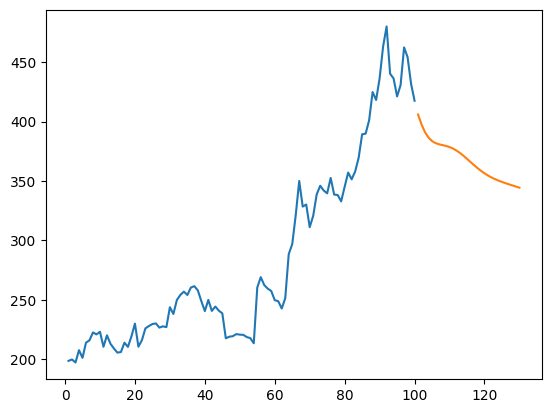

In [167]:
n = len(df1) - 100
print(n)
plt.plot(day_new,df1[n:])
plt.plot(day_pred,scaler.inverse_transform(lst_output))

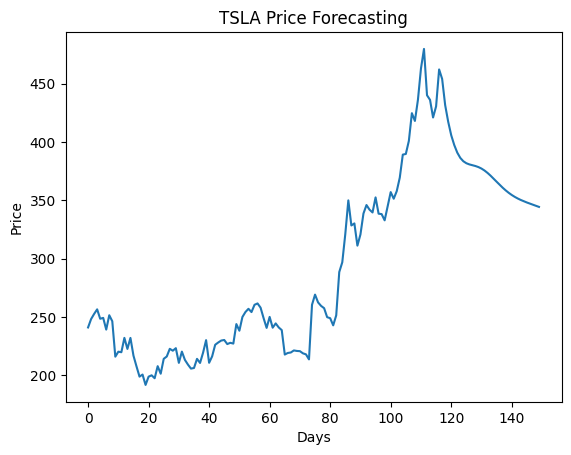

In [172]:
df3=df1.tolist()
df3.extend(scaler.inverse_transform(lst_output))
plt.plot(df3[-150:])
plt.title("TSLA Price Forecasting")
plt.xlabel("Days")
plt.ylabel("Price")
plt.show()

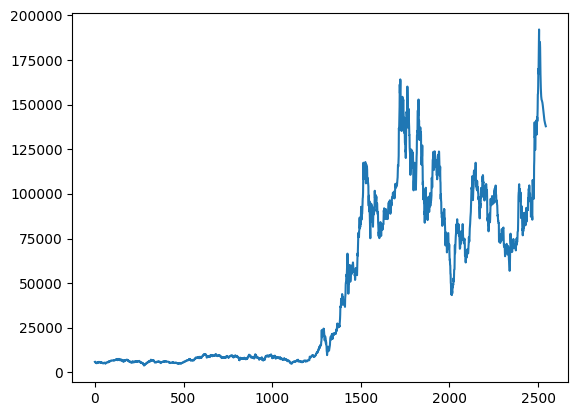

In [173]:

df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)

In [174]:
from tensorflow.keras.models import load_model
model.save("tsla_lstm_model.h5")


In [175]:
import pickle

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)
